<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Trabajo Práctico Nº3
#### Mathilde d'Hébrail



## Generador de señale senoidal (TP1)

Para este TP necesitamos un señal senoidal, entonces pongo aqui el trabajo del TP1 que nos daba este señal:


In [204]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
import matplotlib.pyplot as plt
import pdsmodulos as pds
import math
from math import *
import scipy.signal as sig

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
##############################################
#%% A partir de aquí comienza lo IMPORTANTE #
#############################################

def mi_funcion_sen( vmax, dc, ff, ph, nn, fs ):
    
    ts = 1/fs # tiempo de muestreo
    df = fs/nn # resolución espectral
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (N-1)*ts, N).flatten()
    
    # guardaremos las señales creadas al ir poblando la siguiente matriz vacía
    x = np.array([], dtype=np.float).reshape(N,0)
    
    aux = dc + vmax * np.sin( 2*np.pi*ff*tt + ph )
    xx = aux.reshape(N,1)
    
    return tt, xx


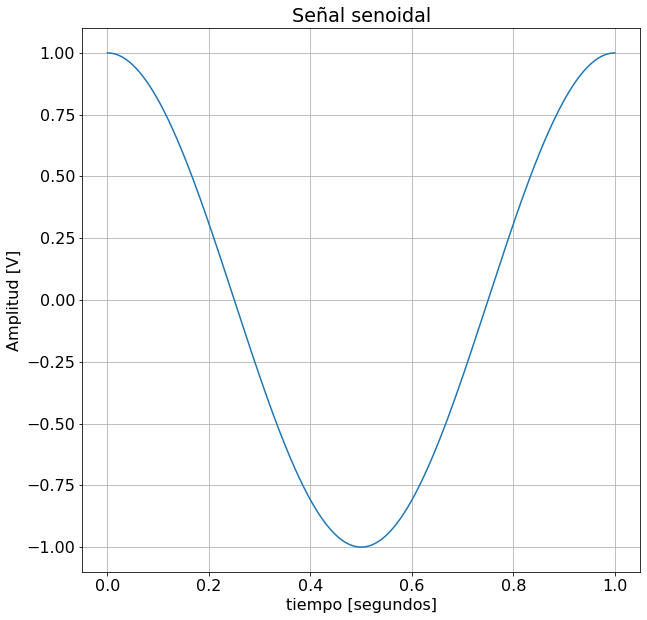

In [205]:
    # Datos generales de la simulación
vmax = 1 #amplitud maximal de la senoidal (volts)
dc = 0 #valor medio (volts)
N = 2000   # cantidad de muestras
fs = N # frecuencia de muestreo (Hz)
ff = fs/N #frequencial del señal (Hz)
ph = np.pi/2 #fase (radianes)

    #Creation del señal
tt, xx = mi_funcion_sen( vmax, dc, ff, ph, N, fs)  
    
    # Presentación gráfica del señal
plt.figure(1)
line_hdls = plt.plot(tt, xx)
plt.title('Señal senoidal' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()
    

## Quantizacion (TP3)

In [206]:
def quantizacion(xx, B, Vf):
    q = 2*Vf/((2**B) - 1)     #Paso de quantizacion
    xx_quantizado =  np.round((xx-q/2)*(1/q))*q + q/2
    return xx_quantizado


Datos de la quantizacion : 

In [207]:
B1 = 4    #numero de Bits
B2 = 8
B3 = 16
Vf = 2      #valor maximal que puede tomar el señal quantizado (en V)

Testamos la funcion sobre el siñal que hemos creado:

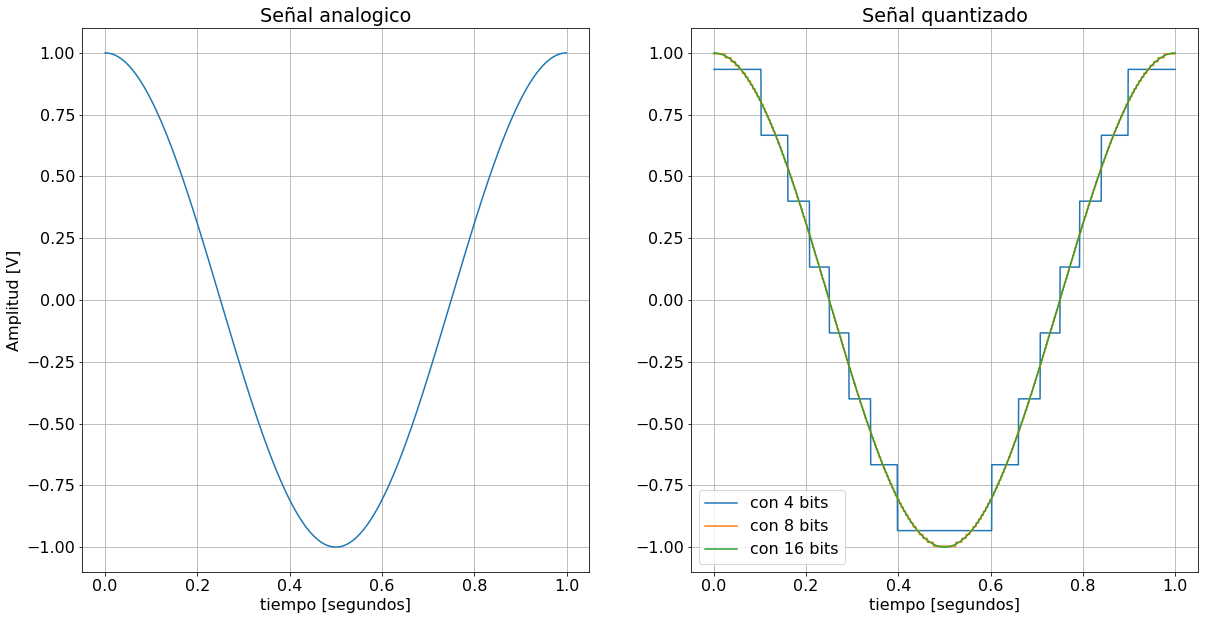

In [208]:
xx_quantizado1 = quantizacion(xx, B1, Vf)
xx_quantizado2 = quantizacion(xx, B2, Vf)
xx_quantizado3 = quantizacion(xx, B3, Vf)


mpl.rcParams['figure.figsize'] = (20,10)

plt.figure(2)
plt.subplot(1, 2, 1)
line_hdls = plt.plot(tt, xx)
plt.title('Señal analogico' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')

plt.subplot(1, 2, 2)
line_hdls = plt.plot(tt, xx_quantizado1, label = "con 4 bits")
line_hdls = plt.plot(tt, xx_quantizado2, label = "con 8 bits")
line_hdls = plt.plot(tt, xx_quantizado3, label = "con 16 bits")
plt.legend()
plt.title('Señal quantizado' )
plt.xlabel('tiempo [segundos]')
plt.grid(which='both', axis='both')

plt.show()


El señal quantizado tiene el mismo rango que el segnal analogico : 1V, y podemos ver que el señal quantizado sigue la forma del señal alaogico. Con màs bits, tenemos valores mas cercas de la valores reales.  

Analyzamos el señal de error : xx_quantizado - xx

In [209]:
error1 = xx_quantizado1 - xx
esperanza1 = error1.mean()
varianza1 = error1.var()
q1 = 2*Vf/((2**4) - 1) 
var_unif1 = (q1**2)/12


error2 = xx_quantizado2 - xx
esperanza2 = error2.mean()
varianza2 = error2.var()
q2 = 2*Vf/((2**8) - 1)
var_unif2 = (q2**2)/12


error3 = xx_quantizado3 - xx
esperanza3 = error3.mean()
varianza3= error3.var()
q3 = 2*Vf/((2**16) - 1) 
var_unif3 = (q3**2)/12


print("La esperanza del señal de error para 4 bits es", esperanza1, "y su varianza es", varianza1) 
print("Para una distrubucion uniforme, la varianza seria", var_unif1)
print("\nLa esperanza del señal de error para 8 bits es", esperanza2, "y su varianza es", varianza2)
print("Para una distrubucion uniforme, la varianza seria", var_unif2)
print("\nLa esperanza del señal de error para 16 bits es", esperanza3, "y su varianza es", varianza3)
print("Para una distrubucion uniforme, la varianza seria", var_unif3)

La esperanza del señal de error para 4 bits es 6.217248937900877e-18 y su varianza es 0.0049997181988412865
Para una distrubucion uniforme, la varianza seria 0.005925925925925926

La esperanza del señal de error para 8 bits es 1.2975731600306517e-18 y su varianza es 1.9858598521692655e-05
Para una distrubucion uniforme, la varianza seria 2.0504933999743685e-05

La esperanza del señal de error para 16 bits es 1.8383596511392653e-17 y su varianza es 3.078603788568365e-10
Para una distrubucion uniforme, la varianza seria 3.104503323251478e-10


Para estos tres señales, la esperanza esta muy cerca de 0 y la varianza esta cerca de la varianza de un señal con distibucion uniforme.

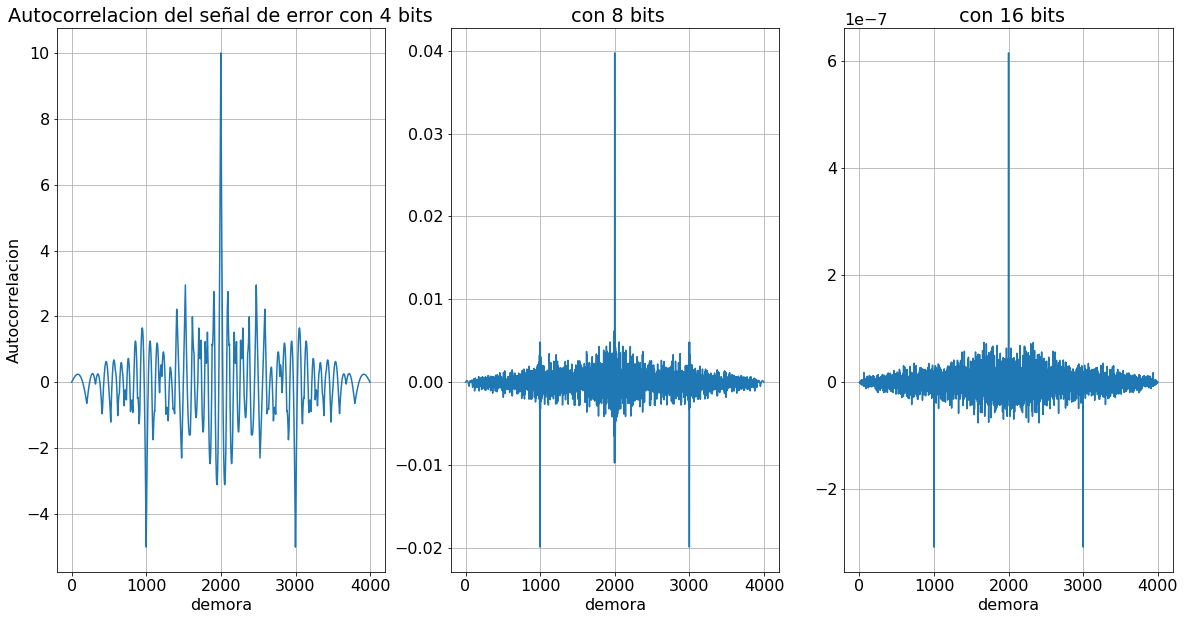

In [210]:
error1_ac = sig.correlate(error1, error1)
error2_ac = sig.correlate(error2, error2)
error3_ac = sig.correlate(error3, error3)

plt.figure(3)
plt.subplot(1, 3, 1)
plt.plot(error1_ac)
plt.title('Autocorrelacion del señal de error con 4 bits', )
plt.xlabel('demora')
plt.ylabel('Autocorrelacion')
plt.grid(which='both', axis='both')

plt.subplot(1, 3, 2)
plt.plot(error2_ac)
plt.title(' con 8 bits' )
plt.xlabel('demora')
plt.grid(which='both', axis='both')

plt.subplot(1, 3, 3)
plt.plot(error3_ac)
plt.title(' con 16 bits' )
plt.xlabel('demora')
plt.grid(which='both', axis='both')